In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import sys

sys.path.append("./../src/")
from . import *

%load_ext autoreload
%matplotlib inline

ModuleNotFoundError: No module named 'functions_CMIP6'

In [24]:
# Variables: tas, pr
# Temporal resolutions: ann, mon, day
# Grid size at 2.5 degrees
# Scenarios CMIP6: historical, hist-GHG, hist-aer, hist-nat, piControl, 
#                  ssp119, ssp126, ssp245, ssp370, ssp434, ssp460, ssp585,
#                  (1pctCO2, abrupt-2xCO2, abrupt-4xCO2, esm-hist, esm-ssp585, esm-1pctCO2, hist-bgc, land-hist, 
#                  ssp534-over, ssp534-over-bgc, ssp585-bgc, 1pctCO2-bgc)
# Date for CMIP6 starting at 1850
# Target: 1) forcing (from ERF files): total, total_anthropogenic, GHG, CO2, aerosols, total_natural, volcanic, solar 
#         2) forced response (computed from the one forcing runs): hist-aer, hist-GHG, hist-nat

grid = (72, 144)
temporalRes = "ann"

variables = ["tas"]
scenario = "hist-aer"
startDate, endDate = 1850, 2014

# forcedResponse_df = computeForcedResponse_CMIP6(variables, temporalRes, scenario, startDate, endDate, norm = True)
forcedResponse_df = pd.read_csv("./../data/local/forcedResponse/CMIP6_forcedResponse_hist-aer.csv", index_col = 'Year')
forcedResponse_df

,ACCESS-ESM1-5,BCC-CSM2-MR,CESM2,CNRM-CM6-1,CanESM5,FGOALS-g3,GFDL-ESM4,GISS-E2-1-G,IPSL-CM6A-LR,MIROC6,MRI-ESM2-0,NorESM2-LM
Year,,,,,,,,,,,,
1850,0.058720,-0.178266,-0.125162,-0.035046,0.058641,0.068580,0.156213,0.105601,-0.038293,-0.057444,0.107854,-0.032017
1851,0.045325,-0.222198,-0.210125,-0.032489,0.053104,0.111017,0.109382,0.039075,0.028729,0.010845,0.082212,-0.055154
1852,0.108541,-0.151991,-0.071292,0.004659,0.045458,0.200501,-0.116726,0.070682,-0.067331,0.007171,0.050494,0.030652
1853,0.083022,-0.106029,-0.085569,0.021121,0.082900,0.012885,0.127686,-0.031316,0.025258,-0.073999,-0.003088,-0.046441
1854,0.032555,-0.190501,0.121146,-0.001217,0.104020,0.122360,-0.039305,-0.062877,-0.007317,-0.042663,0.087385,-0.013457
...,...,...,...,...,...,...,...,...,...,...,...,...
2010,-0.735909,-0.600422,-0.515416,-0.664246,-1.332975,-0.129779,-0.330792,-0.519765,-0.645324,-0.503798,-0.449585,-1.055775
2011,-0.614624,-0.614963,-0.407900,-0.706985,-1.326569,-0.313846,-0.231964,-0.638780,-0.662046,-0.482671,-0.578124,-0.855850
2012,-0.648438,-0.629652,-0.292908,-0.644985,-1.329563,-0.127069,-0.253936,-0.691147,-0.574484,-0.339548,-0.605430,-0.807255


/home/eniko/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/eniko/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/eniko/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


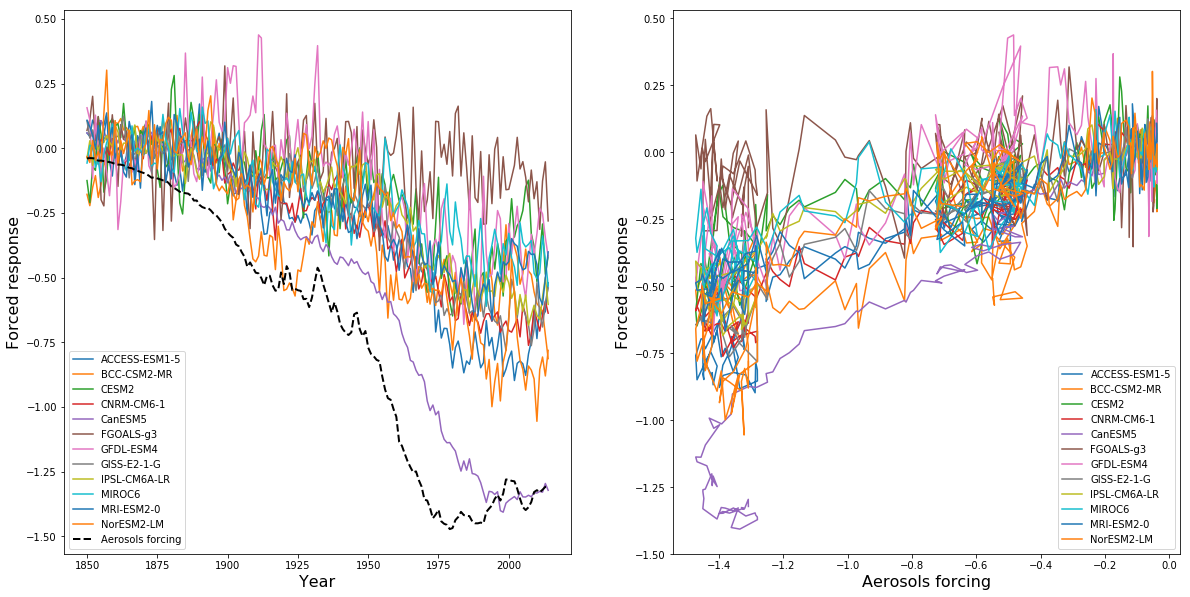

In [3]:
fig, axes = plt.subplots(1, 2, figsize = (20,10))

dirFiles = "./../data/local/radForcing/"
radforcing_df = pd.read_csv(dirFiles + 'ERF_ssp585_1750-2500.csv', index_col = 0)
radforcing_df.index.name = 'Year'
radforcing_df = radforcing_df.loc[startDate : endDate]
radforcing_df = radforcing_df['aerosol-radiation_interactions'] + radforcing_df['aerosol-cloud_interactions']
# radforcing_df = radforcing_df['total_anthropogenic'] - radforcing_df['aerosol-radiation_interactions'] - \
#                                         radforcing_df['aerosol-cloud_interactions']

fig.sca(axes[0])
forcedResponse_df.plot(ax = axes[0])
radforcing_df.plot(ax = axes[0], color = 'k', linestyle = '--', linewidth = 2, label = "Aerosols forcing")
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Forced response", fontsize = 16)
plt.legend();

fig.sca(axes[1])
for i in range(forcedResponse_df.shape[1]):
    plt.plot(radforcing_df, forcedResponse_df.iloc[:,i], label = forcedResponse_df.columns[i])
plt.xlabel("Aerosols forcing", fontsize = 16)
plt.ylabel("Forced response", fontsize = 16)
plt.legend();